# 1. Library

In [60]:
import pandas as pd
import numpy as np
import pandas_profiling

# library untuk eksplorasi data
import matplotlib.pyplot as plt
import seaborn as sns

# library untuk membagi data
from sklearn.model_selection import train_test_split


# library untuk menghitung frekuensi
from collections import Counter

# library untuk evaluasi hasil prediksi
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import make_scorer,precision_score
from sklearn.metrics import recall_score,accuracy_score,f1_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import cross_validate, StratifiedKFold

# library untuk bebrapa model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

# library untuk tunning parameter
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# library untuk menggabungkan beberapa algoritme
from imblearn.pipeline import Pipeline
# library untuk menyeimbangkan data
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import geometric_mean_score
from imblearn.pipeline import Pipeline

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FeatureUnion

import warnings
warnings.filterwarnings('ignore')

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 2. Data

In [3]:
df_label = pd.read_csv('train_jqd04QH.csv')

In [4]:
df_nolabel = pd.read_csv('test_KaymcHn.csv')

In [5]:
df_label.head() 

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


In [6]:
df_nolabel.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16548,city_33,0.448,NaN,No relevent experience,Full time course,Graduate,STEM,<1,1000-4999,Public Sector,NaN,15
1,12036,city_28,0.939,Male,No relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,94
2,11061,city_103,0.920,Male,No relevent experience,Full time course,Graduate,STEM,3,NaN,NaN,1,17
3,5032,city_104,0.924,Male,No relevent experience,no_enrollment,Phd,STEM,>20,50-99,Pvt Ltd,2,76
4,17599,city_77,0.830,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,<10,Pvt Ltd,2,65


# 3. Data Preparation

1. Preprocessing 
1. EDA
1. EDA (FE)

variable identification:
1. target variable
1. categorical
    1. number of category
    1. catory freq
    1. category merging
1. ordinal/discrete: int(few) 
    1. binning
1. numerical: int(many)
    1. scaling (if neccesary)
    1. transfomration
    1. binning

> ## Preprocessing

In [7]:
def understand(df):
    print("Data Dimension: \n",df.shape,"\n")
     
    df_summary = pd.DataFrame((df.isnull().sum()/df.shape[0])*100,columns=['missing'])
    df_summary.sort_values(by='missing',ascending=False,inplace=True)
    df_summary['missing num']=df.isnull().sum()
    df_summary['data types']=df.dtypes
    
    return df_summary[df_summary['missing']>0]

In [8]:
understand(df_label)

Data Dimension: 
 (18359, 14) 



,missing,missing num,data types
company_type,27.447029,5039,object
company_size,26.030830,4779,object
gender,22.321477,4098,object
major_discipline,15.458358,2838,object
education_level,2.489242,457,object
last_new_job,1.999020,367,object
enrolled_university,1.862847,342,object
experience,0.321368,59,object


In [9]:
understand(df_nolabel)

Data Dimension: 
 (15021, 13) 



,missing,missing num,data types
company_type,28.826310,4330,object
company_size,26.968910,4051,object
gender,22.555090,3388,object
major_discipline,15.931030,2393,object
education_level,2.629652,395,object
last_new_job,2.023833,304,object
enrolled_university,1.857400,279,object
experience,0.292923,44,object


> ## EDA

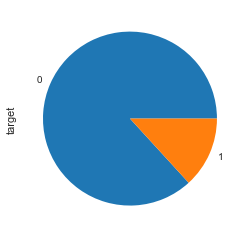

In [11]:
df_label['target'].value_counts().plot(kind='pie')

<div class="alert alert-block alert-info">
    <b>Features</b>
</div>

In [12]:
df_label

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1
5,13342,city_21,0.624,Female,Has relevent experience,no_enrollment,Graduate,Other,8,5000-9999,Pvt Ltd,2,34,0
6,11746,city_21,0.624,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,10000+,Pvt Ltd,3,23,1
7,24127,city_114,0.926,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,<10,Pvt Ltd,>4,8,0
8,7615,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,1000-4999,Pvt Ltd,>4,10,0
9,9676,city_97,0.925,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,1000-4999,Pvt Ltd,>4,85,0


In [30]:
cat_var  = ['city', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'company_size', 'company_type']

In [379]:
len(df_label['city'].unique())

123

In [18]:
for i in cat_col:
    df_label[i].value_counts()

city_103    4358
city_21     1672
city_16     1654
city_114    1472
city_160     827
city_136     624
city_67      455
city_75      332
city_104     318
city_102     313
city_71      281
city_100     271
city_73      264
city_61      217
city_28      212
city_23      194
city_65      188
city_90      180
city_36      175
city_173     156
city_50      150
city_11      150
city_83      142
city_116     131
city_46      128
city_138     126
city_162     125
city_45      119
city_64      119
city_97      109
            ... 
city_167      10
city_2         9
city_59        9
city_48        9
city_109       8
city_106       8
city_79        7
city_43        7
city_131       7
city_81        7
city_146       7
city_120       6
city_180       5
city_82        5
city_42        5
city_62        5
city_155       4
city_25        4
city_8         4
city_18        4
city_31        4
city_107       4
city_139       4
city_166       4
city_179       4
city_121       3
city_129       3
city_111      

Male      12884
Female     1188
Other       189
Name: gender, dtype: int64

Has relevent experience    13596
No relevent experience      4763
Name: relevent_experience, dtype: int64

no_enrollment       13659
Full time course     3187
Part time course     1171
Name: enrolled_university, dtype: int64

Graduate          10769
Masters            4319
High School        2032
Phd                 459
Primary School      323
Name: education_level, dtype: int64

STEM               13738
Humanities           688
Other                343
Business Degree      307
Arts                 239
No Major             206
Name: major_discipline, dtype: int64

50-99        3120
100-500      2698
10000+       2044
10/49        1466
1000-4999    1399
<10          1360
500-999       902
5000-9999     591
Name: company_size, dtype: int64

Pvt Ltd                10051
Funded Startup          1038
Public Sector            996
Early Stage Startup      582
NGO                      534
Other                    119
Name: company_type, dtype: int64

In [25]:
df_label['experience'].value_counts()

>20    3437
5      1309
4      1250
3      1159
6      1125
2       992
9       979
10      967
7       950
8       755
15      695
11      667
14      602
16      549
12      497
1       452
<1      416
13      412
17      347
19      308
18      286
20      146
Name: experience, dtype: int64

In [28]:
df_label['last_new_job'].value_counts()

1        7567
>4       3339
2        2835
never    2186
4        1038
3        1027
Name: last_new_job, dtype: int64

In [20]:
num_var = ['city_development_index','training_hours']

(array([   45.,    77.,   326.,  1718.,  1037.,   449.,   961.,  1049.,
         2506., 10191.]),
 array([0.448 , 0.4981, 0.5482, 0.5983, 0.6484, 0.6985, 0.7486, 0.7987,
        0.8488, 0.8989, 0.949 ]),
 <a list of 10 Patch objects>)

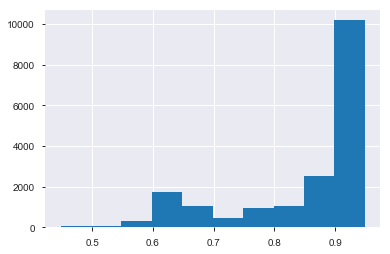

In [21]:
plt.hist(df_label['city_development_index'])

(array([6948., 4931., 2776., 1477., 1027.,  392.,  311.,  168.,  139.,
         190.]),
 array([  1. ,  34.5,  68. , 101.5, 135. , 168.5, 202. , 235.5, 269. ,
        302.5, 336. ]),
 <a list of 10 Patch objects>)

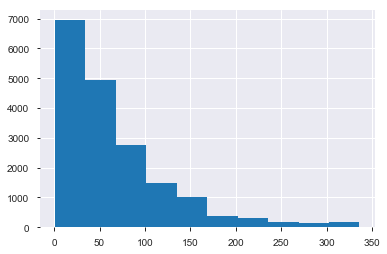

In [27]:
plt.hist(df_label['training_hours'])

> ## EDA (FE)

<div class="alert alert-block alert-info">
    <b>New Features</b>
</div>

# 4. Modeling Process

1. Feature Prep
1. Train Test Split
1. Model Testing
1. Evaluation/metrics
1. Pipeline
1. Optimization

In [365]:
class FeatureSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, feature_names):
        self._feature_names = feature_names
    
    def fit(self, X, y = None):
        return self
    
    def transform (self, X, y = None):
        return X[self._feature_names]
    
# class NumericalTransformer(BaseEstimator, TransformerMixin):
    
#     def __init__(self, new_features = ['city_development_index_bin','training_hours_bin']):
#         self._new_features = new_features
        
#     def fit( self, X, y = None):
#         return self

#     def transform(self, X, y = None):
        
#         X.loc[:,'city_development_index_bin'] = pd.qcut(X['city_development_index'],4)
#         X.loc[:,'training_hours_bin'] = pd.qcut(X['training_hours'],5)
        
#         return X.values

In [366]:
numerical_features = ['city_development_index','training_hours']
categorical_features = cat_var[1:] + ['experience','last_new_job'] 

In [367]:
categorical_pipeline = Pipeline([
    ('cat_selector',FeatureSelector(categorical_features)),
    ('imputer',SimpleImputer(strategy = 'most_frequent')),
    ('one_hot_encoder',OneHotEncoder(sparse = False))
])

numerical_pipeline = Pipeline([
    ('num_selector',FeatureSelector(numerical_features)),
    ('imputer',SimpleImputer(strategy = 'median'))
])

full_pipeline = FeatureUnion([
    ('categorical_pipeline',categorical_pipeline),
    ('numerical_pipeline',numerical_pipeline)    
])

In [368]:
# ?XGBClassifier

In [369]:
X = df_label.drop(columns=['enrollee_id','city'],axis=1)
y = df_label['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify = y,random_state = 42)

# xgb = XGBClassifier(
#     learning_rate = 0.05,
#     n_estimators = 1000,
#     max_depth=2,
#     min_child_weight = 4,
#     gamma=0.5,
#     subsample = 0.6,
#     colsample_bytree = 0.3,
#     reg_alpha= 0.0005,
#     reg_lambda= 0.0001,
#     objective= 'binary:logistic',
#     nthread=4,
#     scale_pos_weight=1,
#     seed=27,
#     n_jobs=-1
# )

xgb = XGBClassifier(
    max_depth=3,
    learning_rate=0.05,
    n_estimators=1000,
    objective='binary:logistic',
    booster='gbtree',
    n_jobs=-1,
    gamma=0.4,
    min_child_weight=4,
    max_delta_step=0,
    subsample = 0.8,
    colsample_bytree = 0.6,
    colsample_bylevel = 0.2,
    colsample_bynode = 0.05,
    reg_alpha=0.0005,
    reg_lambda=0.0001,
    scale_pos_weight=1,
    seed = 27,
    random_state=42
)

full_pipeline_m = Pipeline(steps = [
    ('full_pipeline',full_pipeline),
    ('resampling',RandomUnderSampler()),
    ('model',xgb)
])

In [370]:
def eval1(estimator,X_train,X_test,y_train,y_test):
    y_pred = estimator.predict(X_test)
    y_pred_train = estimator.predict(X_train)
    print("Confusion Matrix :\n",
    confusion_matrix(y_test,y_pred),"\n")
    print("Classification Report :\n",
    classification_report(y_test,y_pred),"\n")
    
    print("Classification Report (Train) :\n",
    classification_report(y_train,y_pred_train),"\n")
    
    
def eval2(y_true,y_prob_test):

    fig, (ax1,ax2) = plt.subplots(1,2)
    fig.set_size_inches(12,6)
    fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_true, y_prob_test)
    ax1.plot(fpr_rf, tpr_rf, label="ROC Curve RF")
    ax1.set_xlabel("1 - Spesifisitas")
    ax1.set_ylabel("Sensistivitas")
    close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
    ax1.plot(fpr_rf[close_default_rf], tpr_rf[close_default_rf], '^', markersize=10, label="threshold 0.5 RF", fillstyle="none", c='k', mew=2)

    # ax1.legend(loc=4)
    precision, recall, thresholds = precision_recall_curve(y_true, y_prob_test)
    close_zero= np.argmin(np.abs(thresholds-0.5))
    ax2.plot(precision[close_zero], recall[close_zero],'o', markersize=10, label='threshold zero', fillstyle='none',c='k',mew=2)
    ax2.plot(precision, recall, label='precision recall curve')
    ax2.set_xlabel('Presisi')
    ax2.set_ylabel('Sensitivitas')
    plt.tight_layout()

    print("auc:\n",roc_auc_score(y_true,y_prob_test))
    
def eval3(y_train,y_prob_train,y_test,y_prob_test,cutoff=0.5):
    y_pred = np.where(y_prob_test>cutoff,1,0)
    y_pred_train = np.where(y_prob_train>cutoff,1,0)
    
    print("Confusion Matrix :\n",
    confusion_matrix(y_test,y_pred),"\n")
    print("Classification Report :\n",
    classification_report(y_test,y_pred),"\n")
    
    print("Classification Report (Train) :\n",
    classification_report(y_train,y_pred_train),"\n")

In [371]:
model = full_pipeline_m
model.fit(X_train,y_train)
y_prob_test = model.predict_proba(X_test)[:,1]
y_prob_train = model.predict_proba(X_train)[:,1]

Pipeline(memory=None,
         steps=[('full_pipeline',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('categorical_pipeline',
                                                 Pipeline(memory=None,
                                                          steps=[('cat_selector',
                                                                  FeatureSelector(feature_names=None)),
                                                                 ('imputer',
                                                                  SimpleImputer(add_indicator=False,
                                                                                copy=True,
                                                                                fill_value=None,
                                                                                missing_values=nan,
                                                                                strategy='most_frequent',

In [372]:
eval1(model,X_train,X_test,y_train,y_test)

Confusion Matrix :
 [[2135 1052]
 [ 243  242]] 

Classification Report :
               precision    recall  f1-score   support

           0       0.90      0.67      0.77      3187
           1       0.19      0.50      0.27       485

    accuracy                           0.65      3672
   macro avg       0.54      0.58      0.52      3672
weighted avg       0.80      0.65      0.70      3672
 

Classification Report (Train) :
               precision    recall  f1-score   support

           0       0.91      0.67      0.77     12747
           1       0.21      0.58      0.31      1940

    accuracy                           0.66     14687
   macro avg       0.56      0.62      0.54     14687
weighted avg       0.82      0.66      0.71     14687
 



auc:
 0.6142447248648666


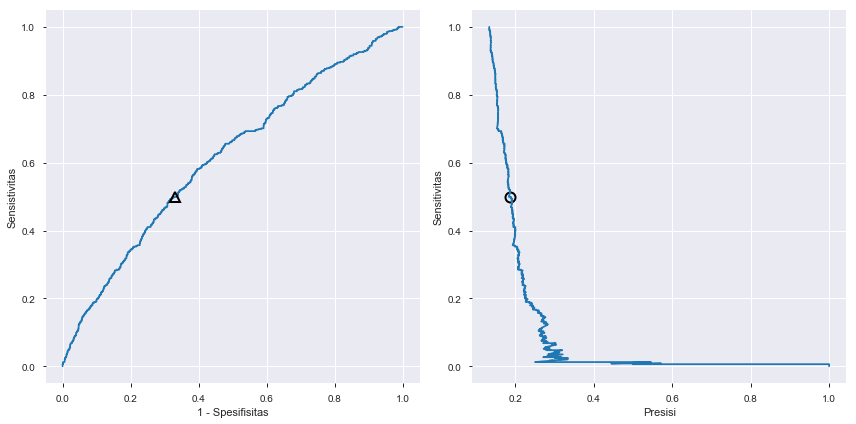

In [373]:
eval2(y_test,y_prob_test)

auc:
 0.6695299439771153


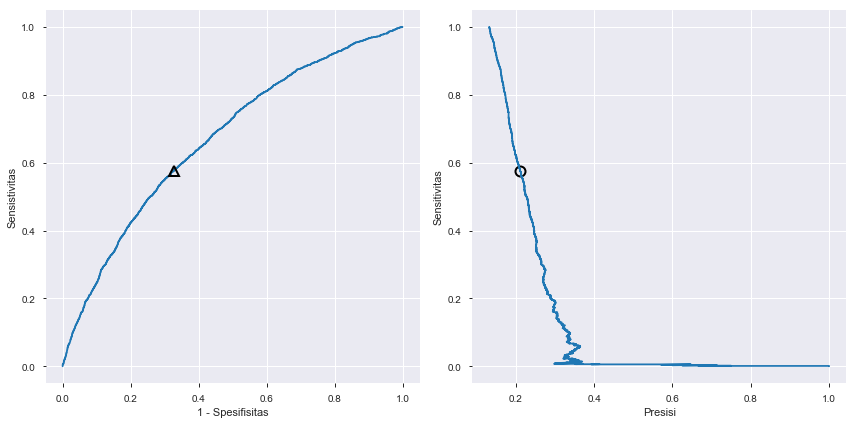

In [374]:
eval2(y_train,y_prob_train)

In [376]:
eval3(y_train,y_prob_train,y_test,y_prob_test,cutoff = 0.5)

Confusion Matrix :
 [[2135 1052]
 [ 243  242]] 

Classification Report :
               precision    recall  f1-score   support

           0       0.90      0.67      0.77      3187
           1       0.19      0.50      0.27       485

    accuracy                           0.65      3672
   macro avg       0.54      0.58      0.52      3672
weighted avg       0.80      0.65      0.70      3672
 

Classification Report (Train) :
               precision    recall  f1-score   support

           0       0.91      0.67      0.77     12747
           1       0.21      0.58      0.31      1940

    accuracy                           0.66     14687
   macro avg       0.56      0.62      0.54     14687
weighted avg       0.82      0.66      0.71     14687
 



# 5. Prediction

In [364]:
xgb = XGBClassifier(
    max_depth=3,
    learning_rate=0.05,
    n_estimators=1000,
    objective='binary:logistic',
    booster='gbtree',
    n_jobs=-1,
    gamma=0.2,
    min_child_weight=4,
    max_delta_step=0,
    subsample = 1,
    colsample_bytree = 0.6,
    colsample_bylevel = 0.3,
    colsample_bynode = 0.1,
    reg_alpha=0.0005,
    reg_lambda=0.0001,
    scale_pos_weight=1,
    seed = 27,
    random_state=42
)

full_pipeline_m = Pipeline(steps = [
    ('full_pipeline',full_pipeline),
    ('model',xgb)
])

model = full_pipeline_m
model.fit(X,y)

y_prob = model.predict_proba(df_nolabel)[:,1]

TypeError: int() argument must be a string, a bytes-like object or a number, not 'pandas._libs.interval.Interval'

In [277]:
df_nolabel['target'] = y_prob
df_nolabel[['enrollee_id','target']].to_csv('submission (class).csv',index=False)